# Рабочая тетрадь 5

## Петренко Егор, ББСО-01-21

### Задание 1

Создайте класс по работе с тригонометрическими функциями. В классе
должны быть реализованы функции вычисления:
− косинуса;
− синуса;
− тангенса;
− арксинуса;
− арккосинуса;
− арктангенса;
− перевода из градусов в радианы.

In [11]:
import numpy as np

class Trigonom:
    @staticmethod
    def cos(x):
        return np.cos(x)

    @staticmethod
    def sin(x):
        return np.sin(x)

    @staticmethod
    def tan(x):
        return np.tan(x)

    @staticmethod
    def arccos(x):
        return np.arccos(x)

    @staticmethod
    def arcsin(x):
        return np.arcsin(x)

    @staticmethod
    def arctan(x):
        return np.arctan(x)

    @staticmethod
    def convert(x):
        return x*np.pi / 180

print(Trigonom.cos(15))

-0.7596879128588213
-0.7596879128588213


### Задание 2
Представьте дерево показанное на рисунке с использованием списка из
списков. Выведите на печать корень дерева, а также его левое и правое
поддеревья.


In [13]:
tree = ['a', ['b', ['d'], ['e']], ['c', ['f']] ]
print("Корень:", tree[0])
print("Левое поддеревье:", tree[1])
print("Правое поддеревье:", tree[2])

Корень: a
Левое поддеревье: ['b', ['d'], ['e']]
Правое поддеревье: ['c', ['f']]


### Задание 3
Дан класс, описывающий бинарное дерево.
class Tree:
 def __init__(self, data):
 self.left = None
 self.right = None
 self.data = data
 def PrintTree(self):
 print(self.data)
Реализуйте в классе функцию для вставки нового элемента в дерево по
следующим правилам:
• Левое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.
• Правое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.
• Каждое из левого и правого поддеревьев также должно быть
бинарным деревом поиска.
• Не должно быть повторяющихся узлов.
Метод вставки сравнивает значение узла с родительским узлом и решает
куда доваить элемент (в левое или правое поддерево). Перепишите, метод
PrintTree для печати полной версии дерева.

In [36]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
    def printTree(self):
        if self.left:
            self.left.printTree()
        if self.right:
            self.right.printTree()
        print(self.data)
    def insert(self, data):
        if data < self.data:
            if self.left is None:
                self.left = Tree(data)
            else:
                self.left.insert(data)
        elif data > self.data:
            if self.right is None:
                self.right = Tree(data)
            else:
                self.right.insert(data)


### Задание 4
Постройте классификатор на основе дерева принятия решений следующего датасета:


[[2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



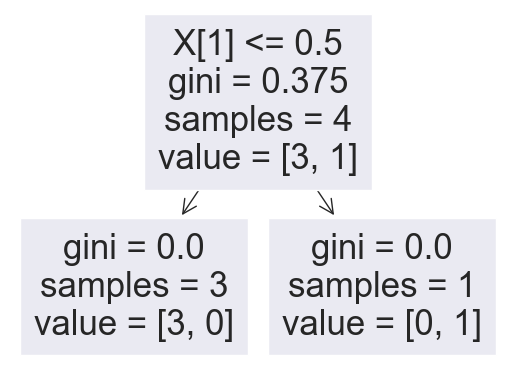

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

X_train, X_test, target_train, target_test = train_test_split(X,
target, test_size = 0.20)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, target_train)

tree.plot_tree(classifier)

target_pred = classifier.predict(X_test)
target_pred

print(confusion_matrix(target_test, target_pred))
print(classification_report(target_test, target_pred))

### Задание 5

Задание. Постройте модель регрессии для данных из предыдущей рабочей
тетради.Для примера можно взять потребления газа (в миллионах
галлонов) в 48 штатах США или набор данных о качестве красного вина:
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pet
rol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv
Постройте прогноз. Оцените точность модели.

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  


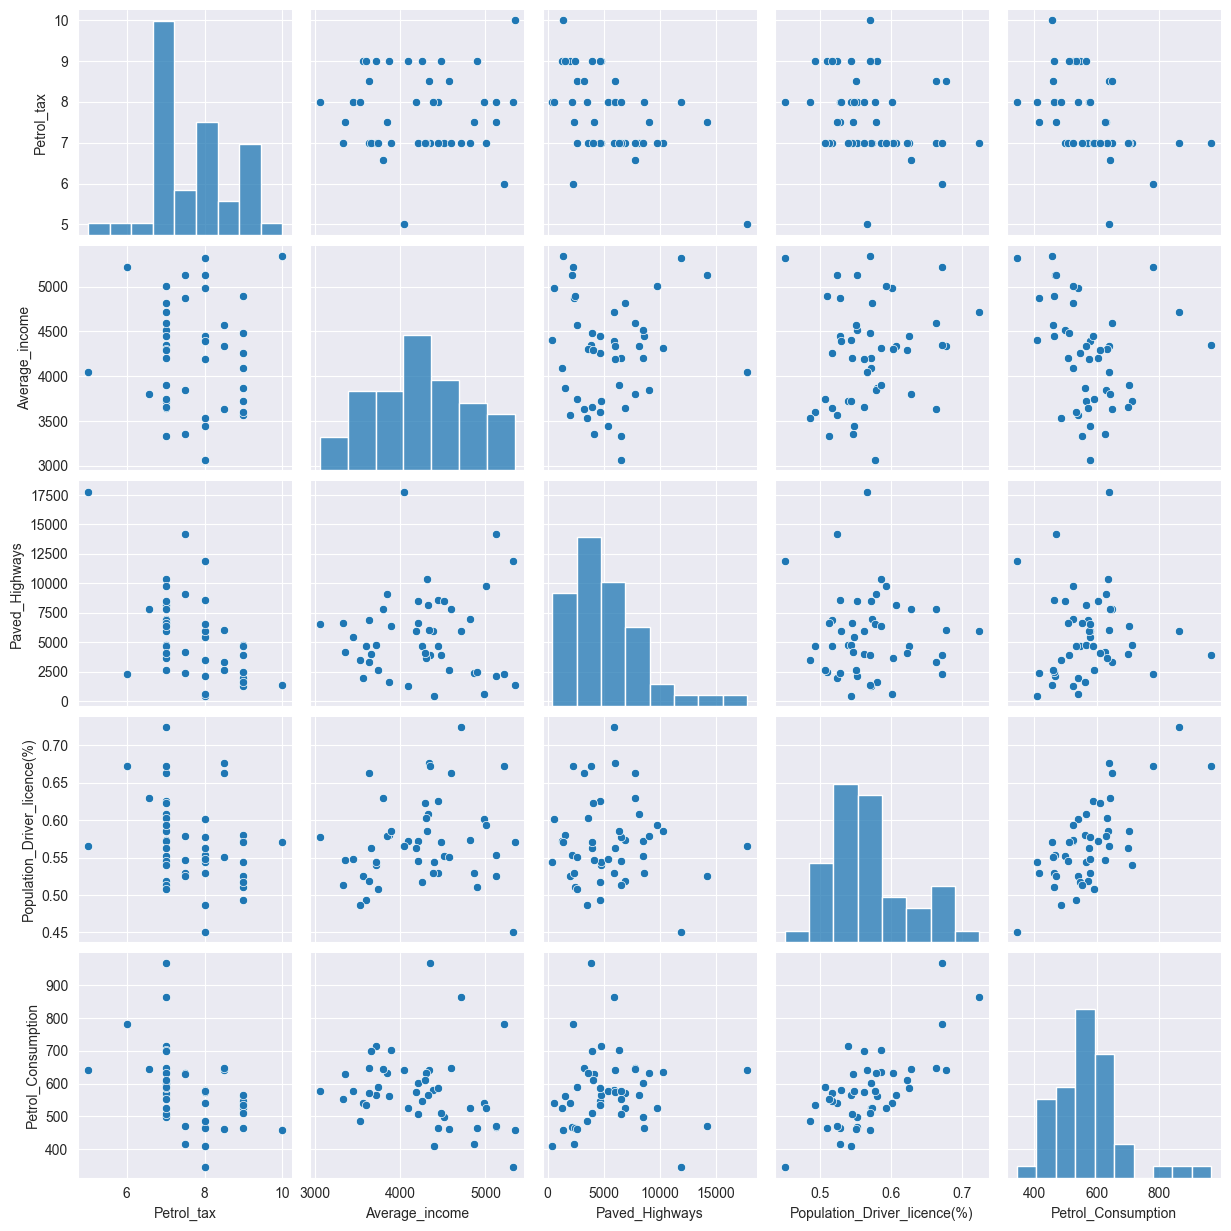

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv")

print(df.head(5))

df.describe()

sns.pairplot(df)

In [37]:
from sklearn.tree import DecisionTreeRegressor

X = df[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption']]
y = df['Petrol_tax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

[Text(0.48863636363636365, 0.95, 'X[3] <= 582.5\nsquared_error = 1.018\nsamples = 38\nvalue = 7.634'),
 Text(0.22727272727272727, 0.85, 'X[1] <= 5360.5\nsquared_error = 0.831\nsamples = 21\nvalue = 8.119'),
 Text(0.09090909090909091, 0.75, 'X[3] <= 435.5\nsquared_error = 0.376\nsamples = 11\nvalue = 8.818'),
 Text(0.045454545454545456, 0.65, 'squared_error = 0.0\nsamples = 1\nvalue = 7.5'),
 Text(0.13636363636363635, 0.65, 'X[3] <= 458.5\nsquared_error = 0.223\nsamples = 10\nvalue = 8.95'),
 Text(0.09090909090909091, 0.55, 'squared_error = 0.0\nsamples = 1\nvalue = 10.0'),
 Text(0.18181818181818182, 0.55, 'X[1] <= 926.0\nsquared_error = 0.111\nsamples = 9\nvalue = 8.833'),
 Text(0.13636363636363635, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = 8.0'),
 Text(0.22727272727272727, 0.45, 'X[3] <= 462.0\nsquared_error = 0.027\nsamples = 8\nvalue = 8.938'),
 Text(0.18181818181818182, 0.35, 'squared_error = 0.0\nsamples = 1\nvalue = 8.5'),
 Text(0.2727272727272727, 0.35, 'squared_error = 0

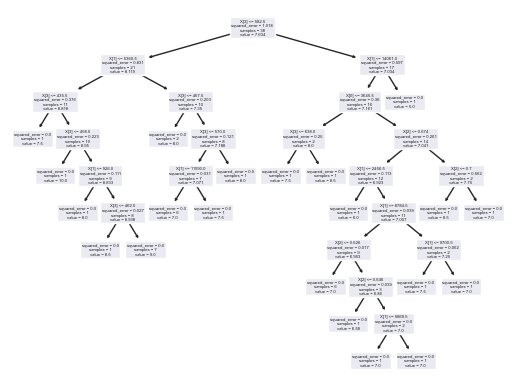

In [38]:
from sklearn import tree
tree.plot_tree(regressor)

In [39]:
y_pred = regressor.predict(X_test)
res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
res

,Actual,Predicted
29,9.0,9.0
4,8.0,7.5
26,8.0,8.0
30,7.0,8.0
32,8.0,8.0
37,7.0,7.0
34,8.0,9.0
40,7.0,7.0
7,8.0,9.0
10,8.0,8.0


In [40]:
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

MSE: 0.325
MAE: 0.35


In [41]:
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

4.564225168441642